# Notebook de nettoyage - Adrian Rodriguez - Projet 3 parcours Ingénieur Machine Learning

---
# 0. Contexte


Vous êtes consultant pour Olist, une solution de vente sur les marketplaces en ligne.

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

### Les données
Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

### Votre mission
Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

Pour des raisons de confidentialité, Olist ne fournit pas beaucoup de données, à vous de fouiller dans celles dont vous disposez et de créer les meilleures features pour les exploiter.

Enfin, votre client, Olist, a spécifié sa demande ainsi :

- La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
- Vous évaluerez la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
- Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

---
# 1. Importation et exploration préliminaire

## 1-1. Découverte des fichiers CSV

In [262]:
import pandas as pd
import glob
import os
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from functions import *

pd.options.display.max_columns = None
plt.style.use("default")

In [263]:
# Pour vérifier le respect de la convention PEP8
# Installation conda non diponible. Utiliser pip
%load_ext pycodestyle_magic
%pycodestyle_on

In [264]:
df_dict = {}
for file in glob.glob('src/olist/*csv'):
    df_name = file.replace('src/olist\\', 'df_').replace('olist_', '')
    df_name = df_name.replace('_dataset.csv', '').replace('.csv', '')
    print(df_name)
    df_dict[df_name] = pd.read_csv(file)

In [265]:
for name, df in df_dict.items():
    display(name)
    display(df.info())
    display(df.head())

'df_customers'

None

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


'df_geolocation'

None

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


'df_orders'

None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


'df_order_items'

None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


'df_order_payments'

None

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


'df_order_reviews'

None

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


'df_products'

None

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


'df_sellers'

None

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


'df_product_category_name_translation'

None

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<img src="src/relation.png"/>

In [266]:
"""
merge_list = [df_dict['df_customers'],
              df_dict['df_order_items'],
              df_dict['df_order_payments'],
              df_dict['df_order_reviews'],
              df_dict['df_products'],
              df_dict['df_product_category_name_translation']
              ]

sales_raw = df_dict['df_orders']
for df in merge_list:
    sales_raw = pd.merge(sales_raw, df, how='inner')

sales_raw.shape
"""

"\nmerge_list = [df_dict['df_customers'],\n              df_dict['df_order_items'],\n              df_dict['df_order_payments'],\n              df_dict['df_order_reviews'],\n              df_dict['df_products'],\n              df_dict['df_product_category_name_translation']\n              ]\n\nsales_raw = df_dict['df_orders']\nfor df in merge_list:\n    sales_raw = pd.merge(sales_raw, df, how='inner')\n\nsales_raw.shape\n"

## 1-2. Association des fichiers CSV

In [267]:
for name, df in df_dict.items():
    display(f'Shape {name} : {df.shape}')

'Shape df_customers : (99441, 5)'

'Shape df_geolocation : (1000163, 5)'

'Shape df_orders : (99441, 8)'

'Shape df_order_items : (112650, 7)'

'Shape df_order_payments : (103886, 5)'

'Shape df_order_reviews : (100000, 7)'

'Shape df_products : (32951, 9)'

'Shape df_sellers : (3095, 4)'

'Shape df_product_category_name_translation : (71, 2)'

Je choisis comment fichier central d'association df_orders, puisqu'il détient 4 relations directes et est le plus proche des clients, cible que je dois segmenter pour cette étude.

Je dispose d'une base de 99 441 commandes. Tout au long des associations des fichiers, je dois m'assurer que chaque jeu de données associées soit sur la même base : 

Fichiers associés :
- **df_customers** : Nombre d'observations identiques aux commandes. Je ne ferais aucune modification.
- **df_products** : Le nombre d'observations est inférieur au nombres d'observations des commandes. Cela ne pose aucun problème particulier, je n'y ferais aucune modification. Ce fichier sera associé au préalable avec df_order_items.
- **df_product_category_name_translation** : Définit les traductions des catégories, ce sera utile pour une meilleure compréhension des personas. Ce fichier sera associé au préalable avec df_products.

Fichiers nécessitant une transformation avant association :
- **df_order_items** : Le nombre d'observations est supérieur au nombres d'observations des commandes. Cela signifie qu'il peut y avoir plusieurs articles par commande. Je dois définir comment transformer ce jeu.
- **df_order_payments** : Le nombre d'observations est supérieur au nombres d'observations des commandes. Cela signifie qu'il peut y avoir plusieurs mode de paiement pour une même commande. Par exemple, une partie en carte de crédit, et une autre partie en bon d'achat. Je dois définir comment transformer ce jeu.
- **df_order_reviews** : Le nombre d'observations est supérieur au nombres d'observations des commandes. Cela signifie qu'il existe peut-être plusieurs avis sur une commande. Je dois définir comment transformer ce jeu

Fichiers non associés :
- **df_geolocation** : Ce jeu apporte en supplément les données de latitude et longitude, je ne m'en servirai pas dans cette étude.
- **df_sellers** : Ce jeu indique la localisation des vendeurs, je ne m'en servirai pas dans cette étude.

### 1-2-1. Traitement de df_order_items

In [268]:
df_dict['df_order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Ici je peux associer les fichiers des produits ainsi que la traduction des catégories

In [269]:
items = pd.merge(df_dict['df_order_items'],
                 df_dict['df_products'],
                 on='product_id')
items = pd.merge(items,
                 df_dict['df_product_category_name_translation'],
                 on='product_category_name',
                 how='left')
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,garden_tools
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,furniture_decor
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0,watches_gifts
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0,sports_leisure


In [270]:
items[items.duplicated(subset='order_id', keep=False)].sort_values(by=['order_id', 'order_item_id']).head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
588,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,garden_tools
589,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,garden_tools
1315,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
1316,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
1317,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
1540,001ab0a7578dd66cd4b0a71f5b6e1e41,1,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,eletronicos,53.0,265.0,2.0,150.0,22.0,13.0,15.0,electronics
1541,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,eletronicos,53.0,265.0,2.0,150.0,22.0,13.0,15.0,electronics
1542,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,eletronicos,53.0,265.0,2.0,150.0,22.0,13.0,15.0,electronics
1763,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,beleza_saude,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty
1764,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,beleza_saude,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty


1:80: E501 line too long (109 > 79 characters)
1:80: E501 line too long (109 > 79 characters)
1:80: E501 line too long (109 > 79 characters)
1:80: E501 line too long (109 > 79 characters)
1:80: E501 line too long (109 > 79 characters)


In [271]:
items.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1627
dtype: int64

In [272]:
items.product_category_name_english[items.product_category_name_english.isna()] = 'unknown'

1:80: E501 line too long (91 > 79 characters)
1:80: E501 line too long (91 > 79 characters)
1:80: E501 line too long (91 > 79 characters)
1:80: E501 line too long (91 > 79 characters)
1:80: E501 line too long (91 > 79 characters)


Pour une même commande, je vais chercher à savoir à quoi correspond `price` et `freight_value` du dataframe.

In [273]:
order_id = '002f98c0f7efd42638ed6100ca699b42'

In [274]:
items[items.order_id == order_id]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
2198,002f98c0f7efd42638ed6100ca699b42,1,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,2017-08-10 09:30:15,8.99,32.57,consoles_games,44.0,228.0,1.0,450.0,30.0,7.0,25.0,consoles_games
2207,002f98c0f7efd42638ed6100ca699b42,2,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,2017-08-10 09:30:15,44.90,7.16,brinquedos,45.0,589.0,4.0,200.0,16.0,7.0,11.0,toys


In [275]:
items[items.order_id == order_id]\
    .groupby('order_id')[['price', 'freight_value']].sum()\
    .sum(axis=1)

order_id
002f98c0f7efd42638ed6100ca699b42    93.62
dtype: float64

In [276]:
df_dict['df_order_payments'][df_dict['df_order_payments'].order_id == order_id]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
74620,002f98c0f7efd42638ed6100ca699b42,1,credit_card,9,93.62


Les sommes des prix des articles et frais d'envoi d'une commande dans dans ce jeu de 

In [277]:
columns = ['order_item_id',
           'product_category_name_english',
           'product_photos_qty',
           'product_description_lenght',
           'price',
           'freight_value']

aggdict = {'order_item_id': lambda x: x.count(),
           'product_category_name_english': lambda x: x.value_counts().index[0],
           'product_photos_qty': lambda x: x.mean(),
           'product_description_lenght': lambda x: x.mean(),
           'price': lambda x: x.sum(),
           'freight_value': lambda x: x.sum()}

order_items = items.groupby('order_id')[columns].agg(aggdict)\
                                  .sort_values(by='order_item_id')

order_items = order_items.rename(columns={'order_item_id': 'n_item',
                                          'product_category_name_english': 'main_category',
                                          'product_photos_qty': 'mean_qty_photo_per_item',
                                          'product_description_lenght': 'mean_description_lenght_per_item',
                                          'price': 'order_amount',
                                          'freight_value': 'freight_amount'})
order_items

,n_item,main_category,mean_qty_photo_per_item,mean_description_lenght_per_item,order_amount,freight_amount
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,cool_stuff,4.000000,598.000000,58.90,13.29
a6e9d106235bcf1dda54253686d89e99,1,computers_accessories,1.000000,258.000000,89.00,16.38
a6e9b80a7636eb8dd592dbb3e20d0a91,1,agro_industry_and_commerce,2.000000,388.000000,465.00,25.79
a6e963c11e80432334e984ead4797a8b,1,watches_gifts,7.000000,539.000000,49.00,14.10
a6e8ad5db31e71f5f12671af561acb4a,1,health_beauty,1.000000,507.000000,17.00,12.43
...,...,...,...,...,...,...
428a2f660dc84138d969ccd69a0ab6d5,15,furniture_decor,2.000000,1744.000000,982.35,243.30
9ef13efd6949e4573a18964dd1bbe7f5,15,garden_tools,2.000000,369.000000,765.00,18.00
1b15974a0141d54e36626dca3fdc731a,20,computers_accessories,1.000000,452.000000,2000.00,202.40


9:80: E501 line too long (80 > 79 characters)
19:80: E501 line too long (91 > 79 characters)
20:80: E501 line too long (90 > 79 characters)
21:80: E501 line too long (107 > 79 characters)
9:80: E501 line too long (80 > 79 characters)
19:80: E501 line too long (91 > 79 characters)
20:80: E501 line too long (90 > 79 characters)
21:80: E501 line too long (107 > 79 characters)
9:80: E501 line too long (80 > 79 characters)
19:80: E501 line too long (91 > 79 characters)
20:80: E501 line too long (90 > 79 characters)
21:80: E501 line too long (107 > 79 characters)
9:80: E501 line too long (80 > 79 characters)
19:80: E501 line too long (91 > 79 characters)
20:80: E501 line too long (90 > 79 characters)
21:80: E501 line too long (107 > 79 characters)
9:80: E501 line too long (80 > 79 characters)
19:80: E501 line too long (91 > 79 characters)
20:80: E501 line too long (90 > 79 characters)
21:80: E501 line too long (107 > 79 characters)


In [278]:
order_items['total_order_amount'] = order_items[['order_amount', 'freight_amount']].sum(axis=1)
order_items

,n_item,main_category,mean_qty_photo_per_item,mean_description_lenght_per_item,order_amount,freight_amount,total_order_amount
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,cool_stuff,4.000000,598.000000,58.90,13.29,72.19
a6e9d106235bcf1dda54253686d89e99,1,computers_accessories,1.000000,258.000000,89.00,16.38,105.38
a6e9b80a7636eb8dd592dbb3e20d0a91,1,agro_industry_and_commerce,2.000000,388.000000,465.00,25.79,490.79
a6e963c11e80432334e984ead4797a8b,1,watches_gifts,7.000000,539.000000,49.00,14.10,63.10
a6e8ad5db31e71f5f12671af561acb4a,1,health_beauty,1.000000,507.000000,17.00,12.43,29.43
...,...,...,...,...,...,...,...
428a2f660dc84138d969ccd69a0ab6d5,15,furniture_decor,2.000000,1744.000000,982.35,243.30,1225.65
9ef13efd6949e4573a18964dd1bbe7f5,15,garden_tools,2.000000,369.000000,765.00,18.00,783.00
1b15974a0141d54e36626dca3fdc731a,20,computers_accessories,1.000000,452.000000,2000.00,202.40,2202.40


1:80: E501 line too long (95 > 79 characters)
1:80: E501 line too long (95 > 79 characters)
1:80: E501 line too long (95 > 79 characters)
1:80: E501 line too long (95 > 79 characters)
1:80: E501 line too long (95 > 79 characters)


### 1-2-2. Traitement de df_order_payments

In [279]:
df_dict['df_order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [280]:
df_dict['df_order_payments'][df_dict['df_order_payments'].duplicated(subset='order_id', keep=False)]\
    .sort_values(by=['order_id', 'payment_sequential']).head(20)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45


Je vérifie à quoi correspond la somme des paiements séquentiels sur une commande.

In [281]:
order_id = '009ac365164f8e06f59d18a08045f6c4'

df_dict['df_order_payments'][df_dict['df_order_payments'].order_id == order_id].sort_values(by='payment_sequential')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17


3:80: E501 line too long (116 > 79 characters)
3:80: E501 line too long (116 > 79 characters)
3:80: E501 line too long (116 > 79 characters)
3:80: E501 line too long (116 > 79 characters)
3:80: E501 line too long (116 > 79 characters)


In [282]:
df_dict['df_order_payments'][df_dict['df_order_payments'].order_id == order_id].groupby('order_id')['payment_value'].sum()

order_id
009ac365164f8e06f59d18a08045f6c4    32.0
Name: payment_value, dtype: float64

1:80: E501 line too long (122 > 79 characters)
1:80: E501 line too long (122 > 79 characters)
1:80: E501 line too long (122 > 79 characters)
1:80: E501 line too long (122 > 79 characters)
1:80: E501 line too long (122 > 79 characters)


In [283]:
items[items.order_id == order_id][['price', 'freight_value']].sum(axis=1)

5957    32.0
dtype: float64

La somme des paiements séquentiels sur une commande est bien égal au total de la commande

In [284]:
df_dict['df_order_payments'][df_dict['df_order_payments'].order_id == order_id].payment_type.nunique()

2

1:80: E501 line too long (102 > 79 characters)
1:80: E501 line too long (102 > 79 characters)
1:80: E501 line too long (102 > 79 characters)
1:80: E501 line too long (102 > 79 characters)
1:80: E501 line too long (102 > 79 characters)


In [285]:
df_dict['df_order_payments']['payment_type_bis'] = df_dict['df_order_payments']['payment_type']

columns = ['payment_sequential',
           'payment_type',
           'payment_type_bis',
           'payment_value']

aggdict = {'payment_sequential': lambda x: x.count(),
           'payment_type': lambda x: x.value_counts().index[0],
           'payment_type_bis': lambda x: x.nunique(),
           'payment_value': lambda x: x.sum()}

order_payments = df_dict['df_order_payments'].groupby('order_id')[columns].agg(aggdict)

order_payments = order_payments.rename(columns={'payment_sequential': 'n_payment',
                                                'payment_type': 'prefered_payment',
                                                'payment_type_bis': 'n_payment_type',
                                                'payment_value': 'total_paid'})

order_payments

,n_payment,prefered_payment,n_payment_type,total_paid
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,1,72.19
00018f77f2f0320c557190d7a144bdd3,1,credit_card,1,259.83
000229ec398224ef6ca0657da4fc703e,1,credit_card,1,216.87
00024acbcdf0a6daa1e931b038114c75,1,credit_card,1,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,1,218.04
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
fffce4705a9662cd70adb13d4a31832d,1,credit_card,1,116.85


1:80: E501 line too long (95 > 79 characters)
13:80: E501 line too long (87 > 79 characters)
15:80: E501 line too long (82 > 79 characters)
16:80: E501 line too long (83 > 79 characters)
17:80: E501 line too long (85 > 79 characters)
1:80: E501 line too long (95 > 79 characters)
13:80: E501 line too long (87 > 79 characters)
15:80: E501 line too long (82 > 79 characters)
16:80: E501 line too long (83 > 79 characters)
17:80: E501 line too long (85 > 79 characters)
1:80: E501 line too long (95 > 79 characters)
13:80: E501 line too long (87 > 79 characters)
15:80: E501 line too long (82 > 79 characters)
16:80: E501 line too long (83 > 79 characters)
17:80: E501 line too long (85 > 79 characters)
1:80: E501 line too long (95 > 79 characters)
13:80: E501 line too long (87 > 79 characters)
15:80: E501 line too long (82 > 79 characters)
16:80: E501 line too long (83 > 79 characters)
17:80: E501 line too long (85 > 79 characters)
1:80: E501 line too long (95 > 79 characters)
13:80: E501 line t

In [286]:
order_payments.sort_values(by='n_payment_type')

,n_payment,prefered_payment,n_payment_type,total_paid
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,1,72.19
aa3d4b2c0fb6da178364768f0d3008f2,1,credit_card,1,75.98
aa3d230ecbebaa35cea8fe4c24739dbc,1,credit_card,1,69.71
aa3bb8a5c7740d386e6318f44046ac14,1,boleto,1,133.35
aa3babada56030c2ad79976c60d51e79,1,boleto,1,93.81
...,...,...,...,...
6a868efa34dccad934e939877994dafe,2,voucher,2,77.10
2dcb16f827ccfc7bff5be2a6deb28bce,2,voucher,2,475.42
0c3e2dc4a3eeb282bd4df0b620dcff6d,3,voucher,2,83.68


### 1-2-3. Traitement de df_order_reviews

In [287]:
df_dict['df_order_reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [288]:
df_dict['df_order_reviews'].groupby('order_id')['review_id'].count()\
                           .value_counts()

1    98886
2      551
3        4
Name: review_id, dtype: int64

Je constate que les données des avis conservent l'historique des avis. Il peut donc y avoir plusieurs notation sur une commande.

In [289]:
order_reviews = df_dict['df_order_reviews']\
                                .sort_values(by=['order_id',
                                                 'review_answer_timestamp'])\
                                .drop_duplicates(subset='order_id',
                                                 keep='last')
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52372,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
28025,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
4244,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
39133,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
56106,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...
48559,9185f849f32d82e216a4e025e0c50f5c,fffc94f6ce00a00581880bf54a75a037,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
21844,be803f6a93d64719fd685c1cc610918a,fffcd46ef2263f404302a634eb57f7eb,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
37790,dbdd81cd59a1a9f94a10a990b4d48dce,fffce4705a9662cd70adb13d4a31832d,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
50858,fba117c9ac40d41ca7be54741f471303,fffe18544ffabc95dfada21779c9644f,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


In [290]:
# Base centrale
display(df_dict['df_orders'].shape)

# Association du fichier customer
sales_raw = pd.merge(df_dict['df_orders'],
                     df_dict['df_customers'],
                     on='customer_id')
display(sales_raw.shape)

# Association des items
sales_raw = pd.merge(sales_raw,
                     order_items,
                     on='order_id',
                     how='outer')
display(sales_raw.shape)

# Association des paiements
sales_raw = pd.merge(sales_raw,
                     order_payments,
                     on='order_id',
                     how='outer')
display(sales_raw.shape)

# Association des avis
sales_raw = pd.merge(sales_raw,
                     order_reviews,
                     on='order_id',
                     how='outer')
display(sales_raw.shape)

# Affichage du dataset
sales_raw

(99441, 8)

(99441, 12)

(99441, 19)

(99441, 23)

(99441, 29)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,n_item,main_category,mean_qty_photo_per_item,mean_description_lenght_per_item,order_amount,freight_amount,total_order_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,housewares,4.0,268.0,29.99,8.72,38.71,3.0,voucher,2.0,38.71,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,perfumery,1.0,178.0,118.70,22.76,141.46,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,auto,1.0,232.0,159.90,19.22,179.12,1.0,credit_card,1.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,pet_shop,3.0,468.0,45.00,27.20,72.20,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,stationery,4.0,316.0,19.90,8.72,28.62,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,health_beauty,1.0,1517.0,72.00,13.08,85.08,1.0,credit_card,1.0,85.08,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,baby,4.0,828.0,174.90,20.10,195.00,1.0,credit_card,1.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,home_appliances_2,2.0,500.0,205.99,65.02,271.01,1.0,credit_card,1.0,271.01,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e

In [291]:
sales_raw.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'n_item', 'main_category', 'mean_qty_photo_per_item',
       'mean_description_lenght_per_item', 'order_amount', 'freight_amount',
       'total_order_amount', 'n_payment', 'prefered_payment', 'n_payment_type',
       'total_paid', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [292]:
sales_raw.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,n_item,main_category,mean_qty_photo_per_item,mean_description_lenght_per_item,order_amount,freight_amount,total_order_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,housewares,4.0,268.0,29.99,8.72,38.71,3.0,voucher,2.0,38.71,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,perfumery,1.0,178.0,118.70,22.76,141.46,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,auto,1.0,232.0,159.90,19.22,179.12,1.0,credit_card,1.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,pet_shop,3.0,468.0,45.00,27.20,72.20,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,stationery,4.0,316.0,19.90,8.72,28.62,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [293]:
sales = sales_raw.copy()

---
# 2. Vérification de la qualité des données

## 2-1. Vérification du contenu dupliqué

In [294]:
sales[sales.duplicated(subset='order_id')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,n_item,main_category,mean_qty_photo_per_item,mean_description_lenght_per_item,order_amount,freight_amount,total_order_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


Il n'y a pas de commandes dupliquées

## 2-2. Vérification des valeurs manquantes

In [295]:
sales.isna().sum()

order_id                                0
customer_id                             0
order_status                            0
order_purchase_timestamp                0
order_approved_at                     160
order_delivered_carrier_date         1783
order_delivered_customer_date        2965
order_estimated_delivery_date           0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_city                           0
customer_state                          0
n_item                                775
main_category                         775
mean_qty_photo_per_item              2164
mean_description_lenght_per_item     2164
order_amount                          775
freight_amount                        775
total_order_amount                    775
n_payment                               1
prefered_payment                        1
n_payment_type                          1
total_paid                              1
review_id                         

In [296]:
sales[sales_raw.n_item.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,n_item,main_category,mean_qty_photo_per_item,mean_description_lenght_per_item,order_amount,freight_amount,total_order_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,84.00,7fb04ba6e8b915c62557517d5c1e04ee,1,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07 00:00:00,2017-12-11 10:37:57
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,97.68,b6ea5566d6060db04ebe53a1291e4541,3,NaN,NaN,2018-02-18 00:00:00,2018-02-20 19:23:56
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,132.46,aaeb804fe1828db8cc3d8b52ec38a1fa,1,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10 00:00:00,2017-09-12 17:00:15
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,134.38,519e62c42f33dce5b47ffddf9fde28df,1,NaN,Não compre,2018-02-09 00:00:00,2018-02-09 03:22:43
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.00,9c0d840dfe562debfa52a1792bd64bff,1,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28 00:00:00,2018-08-28 18:25:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,210.09,396e26da77b10734f3f8b5d5515fef4e,1,NaN,"UMA BOSTA NAO ENTREGA, E NAO FAZ ESTORNO DO VA...",2018-02-09 00:00:00,2018-02-09 10:12:45
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,voucher,1.0,63.89,16d3db296c46b4411dfc5f8bde882e6d,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 16:26:05
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,voucher,1.0,107.13,047fd109ced39e02296f6aeb74f6a6f1,4,NaN,NaN,2018-07-31 00:00:00,2018-08-02 15:11:49
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,195.91,41b9de18e0dd1e085e3c402d1c9b87d0,1,NaN,Fiz a compra do produto para presentear uma pe...,2017-09-20 00:00:00,2017-09-20 11:20:09


Je trouve des commandes sans panier. mais qui sont out de même notées par le clients. J'approfondis en explorant les commentaires

In [297]:
sales[['order_status', 'review_comment_message']][sales.n_item.isna() & sales.review_comment_message.notna()].head(50)

,order_status,review_comment_message
266,unavailable,Anunciam um produto que não tem em estoque e a...
687,unavailable,Até hoje não recebi meu produto e nem uma resp...
737,unavailable,Não compre
1130,canceled,Comprei dois fones de ouvido com valor de R$ 5...
1160,unavailable,"Comprei um perfume Bleu de Chanel , paguei e n..."
1579,unavailable,"voces se tornaram corruptos,paguei e ainda nao..."
1801,canceled,O produto veio com defeito ele não liga não fu...
1826,unavailable,Estou esperando até agora a entrega do produto...
1868,canceled,Razoável
2148,unavailable,Embora não tenha recebido a mercadoria por não...


1:80: E501 line too long (118 > 79 characters)
1:80: E501 line too long (118 > 79 characters)
1:80: E501 line too long (118 > 79 characters)
1:80: E501 line too long (118 > 79 characters)
1:80: E501 line too long (118 > 79 characters)


Il s'agit de commande "non valable" ou "annulée", laissant des clients mécontents. Je les conserve en vue de la segmentation.

Je note aussi des dates de livraisons manquantes. Je les conserve car cela signifie que le client n'a pas été livré. Les autres valeurs manquantes sont également conservés car il n'y a aucune incidence pour le moment.

In [298]:
sales[sales.prefered_payment.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,n_item,main_category,mean_qty_photo_per_item,mean_description_lenght_per_item,order_amount,freight_amount,total_order_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,3.0,health_beauty,1.0,1036.0,134.97,8.49,143.46,NaN,NaN,NaN,NaN,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28


Un client n'a pas payé sa commande. Je passe ces valeurs à 0

In [299]:
col_pay = ['n_payment', 'prefered_payment', 'n_payment_type', 'total_paid']
for c in col_pay:
    sales[c][sales[c].isna()] = 0

In [300]:
sales

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,n_item,main_category,mean_qty_photo_per_item,mean_description_lenght_per_item,order_amount,freight_amount,total_order_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,housewares,4.0,268.0,29.99,8.72,38.71,3.0,voucher,2.0,38.71,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,perfumery,1.0,178.0,118.70,22.76,141.46,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,auto,1.0,232.0,159.90,19.22,179.12,1.0,credit_card,1.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,pet_shop,3.0,468.0,45.00,27.20,72.20,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,stationery,4.0,316.0,19.90,8.72,28.62,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,health_beauty,1.0,1517.0,72.00,13.08,85.08,1.0,credit_card,1.0,85.08,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,baby,4.0,828.0,174.90,20.10,195.00,1.0,credit_card,1.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,home_appliances_2,2.0,500.0,205.99,65.02,271.01,1.0,credit_card,1.0,271.01,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e

## 2-3. Conversion des données date

In [301]:
# Conversion des variables dates
timestamp = ['order_purchase_timestamp',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']

for t in timestamp:
    sales[t] = pd.to_datetime(sales[t],
                              format="%Y-%m-%d %H:%M:%S")

In [302]:
display(sales.order_purchase_timestamp.min())
display(sales.order_purchase_timestamp.max())

Timestamp('2016-09-04 21:15:19')

Timestamp('2018-10-17 17:30:18')

---
# 3. Chiffres clés d'Olist
## 3-2. Principaux indicateurs

In [303]:
print('Chiffres-clés')
print(f'Clients : {sales.customer_unique_id.nunique()}')
print(f'Commandes : {sales.order_id.nunique()}')
print(f'Volume de produits vendus : {sales.n_item.sum()}')

## 3-1. Etude du taux de rétention
### 3-1-1. Taux de rétention global

In [304]:
cutomer_order = sales.groupby(['customer_unique_id'])['order_id'].count()
round(cutomer_order.value_counts(normalize=True).head(5) * 100, 2)

1    96.88
2     2.86
3     0.21
4     0.03
5     0.01
Name: order_id, dtype: float64

97 % des clients n'ont pas recommandé la même année

### 3-2-2. Taux de rétention par cohorte mensuelle

In [305]:
# Récupération des mois de commandes
sales['order_purchase_month'] = sales.order_purchase_timestamp.apply(get_month)
# Récupération de la première date de commande pour le client
sales['cohort_month'] = (sales.groupby('customer_unique_id')
                                        ['order_purchase_month'].transform('min'))

5:41: E127 continuation line over-indented for visual indent
5:80: E501 line too long (82 > 79 characters)
5:41: E127 continuation line over-indented for visual indent
5:80: E501 line too long (82 > 79 characters)
5:41: E127 continuation line over-indented for visual indent
5:80: E501 line too long (82 > 79 characters)
5:41: E127 continuation line over-indented for visual indent
5:80: E501 line too long (82 > 79 characters)
5:41: E127 continuation line over-indented for visual indent
5:80: E501 line too long (82 > 79 characters)


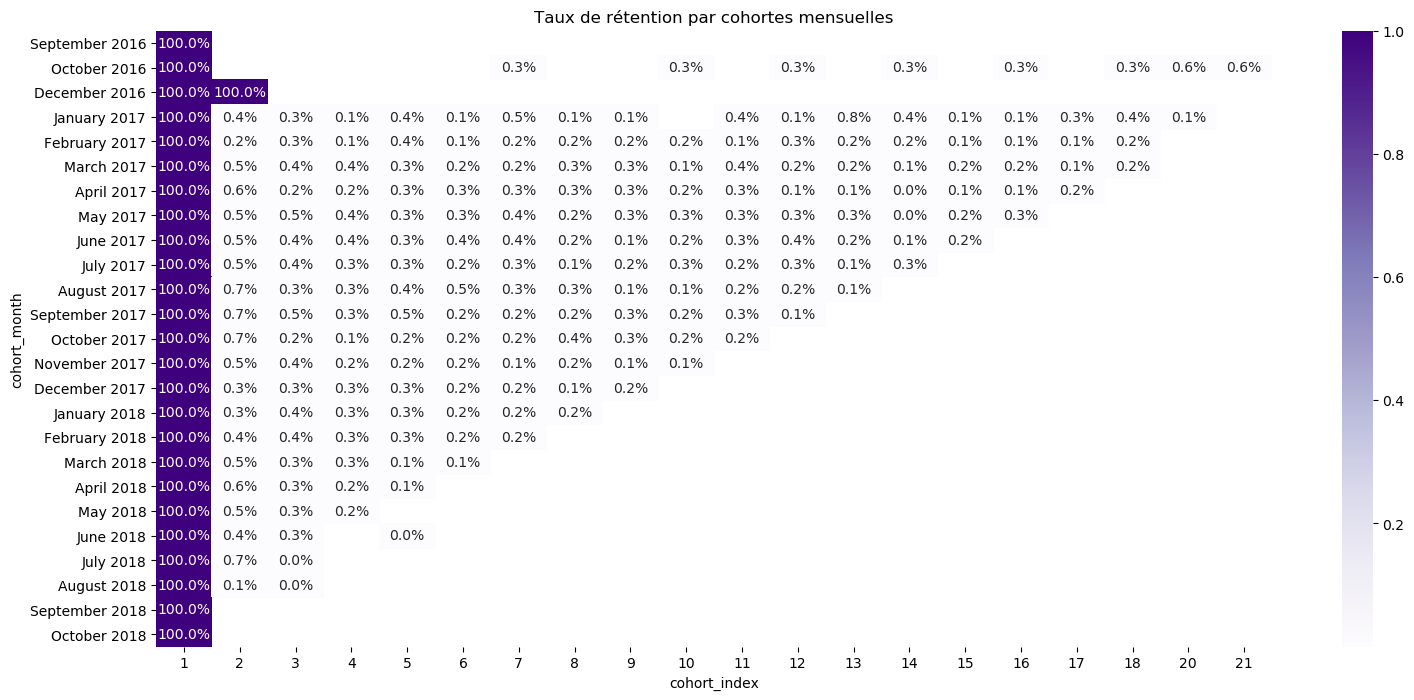

7:80: E501 line too long (94 > 79 characters)
7:80: E501 line too long (94 > 79 characters)
7:80: E501 line too long (94 > 79 characters)
7:80: E501 line too long (94 > 79 characters)
7:80: E501 line too long (94 > 79 characters)


In [306]:
# Calcul en mois de la différence entre la première commande et celle observée
order_purchase_year, order_purchase_month, _ = \
    get_date_int(sales, 'order_purchase_month')

cohort_year, cohort_month, _ = get_date_int(sales, 'cohort_month')

# Je tiens compte de l'année au cas où je souhaiterais étendre l'étude ou chevaucher une année
years_diff = order_purchase_year - cohort_year
months_diff = order_purchase_month - cohort_month

sales['cohort_index'] = years_diff * 12 + months_diff + 1

# Construction du tableau pivoté pour observé le taux de rétention
cohort_data = (sales.groupby(['cohort_month', 'cohort_index'])
               ['customer_unique_id'].apply(pd.Series.nunique).reset_index())
cohort_counts = cohort_data.pivot(index='cohort_month',
                                  columns='cohort_index',
                                  values='customer_unique_id')

# Taux de rétention par cohortes mensuelles
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index = retention.index.strftime('%B %Y')

# Affichage du tableau
plt.figure(figsize=(18, 8))
plt.title('Taux de rétention par cohortes mensuelles')
sns.heatmap(retention,
            annot=True,
            fmt='.1%',
            cmap='Purples')

plt.savefig('img/img_retention_map.png',
            dpi=500,
            quality=95,
            transparent=True)

---
# 4. Etude RFM
## 4-1. Construction des métriques RFM
Pour construire les métriques RFM et avoir quelquechose de cohérent, je me place comme si les données étaient récentes, soit au 2 janvier 2018.

In [307]:
snapshot_date = (sales.order_purchase_timestamp.max() + dt.timedelta(days=2))\
                .replace(hour=0, minute=0, second=0)
snapshot_date

Timestamp('2018-10-19 00:00:00')

Pour la métrique **Recency**, je calcule la différence en la date de snapshot et la date de commande la plus récente, en nombre de jours.   
Pour la métrique **Frequency**, je compte le nombre de commande.    
Pour la métrique **MonetaryValue**, je prend en compte la valeur du produits, sans les frais de port. Si un client à acheter plusieurs produits, que ce soit dans la même commande ou plusieurs commande, je somme les valeurs des produits

In [308]:
# RFM Metrics
sales_RFM = sales.groupby(['customer_unique_id']).agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'total_paid': 'sum'})

sales_RFM.rename(columns={'order_purchase_timestamp': 'recency',
                            'order_id': 'frequency',
                            'total_paid': 'monetary_value'}, inplace=True)

sales_RFM

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
0000f46a3911fa3c0805444483337064,587,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62
0004aac84e0df4da2b147fca70cf8255,338,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,312,1,84.58
ffff371b4d645b6ecea244b27531430a,618,1,112.46


8:29: E127 continuation line over-indented for visual indent
8:29: E127 continuation line over-indented for visual indent
8:29: E127 continuation line over-indented for visual indent
8:29: E127 continuation line over-indented for visual indent
8:29: E127 continuation line over-indented for visual indent


## 4-2. Segmentation RFM

In [309]:
RFM = sales_RFM

In [310]:
# Bien expliquer la catégorisation
round(RFM.frequency.value_counts(normalize=True).cumsum(), 3).head(5)

1    0.969
2    0.997
3    0.999
4    1.000
5    1.000
Name: frequency, dtype: float64

On retrouve bien le taux de rétention calculé auparavant

In [311]:
# Construction des segments
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(RFM['recency'], 4, labels=r_labels)
m_quartiles = pd.qcut(RFM['monetary_value'], 4, labels=m_labels)

RFM = RFM.assign(R=r_quartiles.values)

RFM['F'] = RFM.frequency
RFM['F'][RFM.frequency > 3] = 4

RFM = RFM.assign(M=m_quartiles.values)

RFM

,recency,frequency,monetary_value,R,F,M
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,4,1,3
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4,1,1
0000f46a3911fa3c0805444483337064,587,1,86.22,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62,2,1,1
0004aac84e0df4da2b147fca70cf8255,338,1,196.89,2,1,4
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497,1,2067.42,1,1,4
fffea47cd6d3cc0a88bd621562a9d061,312,1,84.58,2,1,2
ffff371b4d645b6ecea244b27531430a,618,1,112.46,1,1,3


In [312]:
RFM['RFM_Segment'] = RFM.apply(join_rfm, axis=1)
RFM['RFM_Score'] = RFM[['R', 'F', 'M']].sum(axis=1)
RFM

,recency,frequency,monetary_value,R,F,M,RFM_Segment,RFM_Score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,4,1,3,413,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4,1,1,411,6.0
0000f46a3911fa3c0805444483337064,587,1,86.22,1,1,2,112,4.0
0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62,2,1,1,211,4.0
0004aac84e0df4da2b147fca70cf8255,338,1,196.89,2,1,4,214,7.0
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497,1,2067.42,1,1,4,114,6.0
fffea47cd6d3cc0a88bd621562a9d061,312,1,84.58,2,1,2,212,5.0
ffff371b4d645b6ecea244b27531430a,618,1,112.46,1,1,3,113,5.0


## 4-3. Analyse de la segmentation

In [313]:
# 10 premiers segments les plus peuplés
RFM.groupby('RFM_Segment').size().\
    sort_values(ascending=False).head(10)

RFM_Segment
112    6181
111    6136
212    6086
413    6022
311    5996
411    5964
313    5930
211    5875
213    5765
312    5750
dtype: int64

In [314]:
# Valeur des segments
RFM.groupby('RFM_Score').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']}).round(1)

recency frequency monetary_value       
             mean      mean           mean  count
RFM_Score                                        
3.0         506.1       1.0           43.8   6136
4.0         415.7       1.0           64.3  12070
5.0         347.8       1.0           87.9  17711
6.0         287.4       1.0          164.8  23260
7.0         222.4       1.0          204.1  17709
8.0         167.4       1.1          258.8  12251
9.0         118.5       1.1          395.5   6319
10.0        118.3       2.1          402.4    546
11.0        123.7       3.5          678.5     71
12.0        102.6       5.1          961.6     23

A ce niveau, nous obtenons 10 segments avec une segmentation RFM classique, tel qu'on la ferait dans un service marketing.    
Je vais maintenant procéder à une classification non supervisée en utilisant la puissance des algorithmes adaptés à notre problématique métier.

In [315]:
sales_RFM

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
0000f46a3911fa3c0805444483337064,587,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62
0004aac84e0df4da2b147fca70cf8255,338,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,312,1,84.58
ffff371b4d645b6ecea244b27531430a,618,1,112.46


# 5. Feature engineering - Part 1

In [316]:
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,n_item,main_category,mean_qty_photo_per_item,mean_description_lenght_per_item,order_amount,freight_amount,total_order_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_purchase_month,cohort_month,cohort_index
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,housewares,4.0,268.0,29.99,8.72,38.71,3.0,voucher,2.0,38.71,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10-01,2017-09-01,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,perfumery,1.0,178.0,118.70,22.76,141.46,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,2018-07-01,2018-07-01,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,auto,1.0,232.0,159.90,19.22,179.12,1.0,credit_card,1.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,2018-08-01,2018-08-01,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,pet_shop,3.0,468.0,45.00,27.20,72.20,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,2017-11-01,2017-11-01,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,stationery,4.0,316.0,19.90,8.72,28.62,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,2018-02-01,2018-02-01,1


## 5-2. Respect du délai de livraison selon le client

0 = N'a jamais recu le colis, soit par commande annulée, soit jamais reçu le colis ou quelconque raisons   
1 = A reçu le colis en retard   
2 = A reçu le colis dans le délai requis

In [317]:
sales['delay_delivery'] = sales.order_estimated_delivery_date\
                          - sales.order_delivered_customer_date

sales['delivery_respect'] = 0
sales['delivery_respect'][sales['delay_delivery'] < dt.timedelta(days=0)] = 1
sales['delivery_respect'][sales['delay_delivery'] >= dt.timedelta(days=0)] = 2
round(sales.delivery_respect.value_counts(normalize=True), 2)

2    0.89
1    0.08
0    0.03
Name: delivery_respect, dtype: float64

89 % des articles achetés ont été livrées dans les temps.

## 5-2. Groupage des catégories

In [318]:
cat = pd.read_excel('dictionnaire.xlsx', sheet_name='category')
cat

sales = pd.merge(sales,
                 cat)

In [319]:
sales.master_category_fr.value_counts(normalize=True) * 100

Mode Bagage             25.188469
Meuble Déco             18.813959
Informatique             9.737635
Sport                    7.960424
Electoménager            7.746501
Jardin Animalerie        5.802676
Téléphonie               4.529420
Auto Moto                3.977127
Jouets                   3.959643
Librairie                3.196511
Bébé                     2.975389
Bricolage                2.157748
TV Son Photo             1.170409
Jeux Vidéo               1.085045
Alimentation Boisson     0.986311
Autres                   0.712736
Name: master_category_fr, dtype: float64

## 5-3. Transformation du fichier sales

In [320]:
sales.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'n_item', 'main_category', 'mean_qty_photo_per_item',
       'mean_description_lenght_per_item', 'order_amount', 'freight_amount',
       'total_order_amount', 'n_payment', 'prefered_payment', 'n_payment_type',
       'total_paid', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_purchase_month', 'cohort_month',
       'cohort_index', 'delay_delivery', 'delivery_respect',
       'master_category_fr'],
      dtype='object')

In [321]:
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,n_item,main_category,mean_qty_photo_per_item,mean_description_lenght_per_item,order_amount,freight_amount,total_order_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_purchase_month,cohort_month,cohort_index,delay_delivery,delivery_respect,master_category_fr
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,housewares,4.0,268.0,29.99,8.72,38.71,3.0,voucher,2.0,38.71,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10-01,2017-09-01,2,7 days 02:34:47,2,Electoménager
1,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1.0,housewares,6.0,664.0,339.00,17.12,356.12,1.0,credit_card,1.0,356.12,5caca29ffffe9086162ca51303817420,1,NaN,"Inicialmente, na data da compra o produto era ...",2017-12-22 00:00:00,2017-12-28 11:25:32,2017-11-01,2017-11-01,1,-8 days +05:00:37,1,Electoménager
2,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,5.0,housewares,3.0,698.0,190.00,77.80,267.80,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1,NaN,NaN,2017-05-11 00:00:00,2017-05-12 11:25:49,2017-04-01,2017-04-01,1,1 days 14:42:05,2,Electoménager
3,e3447938231fb6ba2fee0231b51eca59,2c3642e1392097fb4af76a76fec16a46,delivered,2018-08-26 11:04:26,2018-08-26 11:15:29,2018-08-27 15:52:00,2018-08-28 21:06:31,2018-08-30,08de4d9507128e2ad419e26cc4f22b65,11440,guaruja,SP,1.0,housewares,8.0,1632.0,160.00,12.14,172.14,1.0,credit_card,1.0,172.14,eec56fe350a345430c241eec25016592,5,"Produto muito bonito, gos","Produto muito bonito, chegou no prazo correto ...",2018-08-29 00:00:00,2018-09-03 20:04:20,2018-08-01,2018-08-01,1,1 days 02:53:29,2,Electoménager
4,af5b0604e113e1526593d505a26ef39d,b896b244963dc7543d400ad82d6710e0,delivered,2017-09-27 12:07:22,2017-09-27 12:26:02,2017-09-29 22:25:42,2017-09-30 17:13:01,2017-10-16,3d8614b1f25530eca12661dc8b10a2fb,3962,sao paulo,SP,1.0,housewares,1.0,299.0,19.90,8.72,28.62,1.0,voucher,1.0,28.62,7bacbdbc339a96b8be7ddf0b1b7e6787,1,NaN,"Boa noite, não recebi o escorredor de louça, C...",2017-10-01 00:00:00,2017-10-03 23:54:54,2017-09-01,2017-09-01,1,15 days 06:46:59,2,Electoménager


In [326]:
columns = ['order_status',
           'customer_state',
           'n_item',
           'master_category_fr',
           'mean_qty_photo_per_item',
           'mean_description_lenght_per_item',
           'n_payment',
           'n_payment_type',
           'prefered_payment',
           'total_paid',
           'review_score',
           'delivery_respect']

aggdict = {'order_status': lambda x: x.value_counts().index[0],
           'customer_state': lambda x: x.value_counts().index[0],
           'n_item': 'mean',
           'master_category_fr': lambda x: x.value_counts().index[0],
           'mean_qty_photo_per_item': 'mean',
           'mean_description_lenght_per_item': 'mean',
           'n_payment': 'mean',
           'n_payment_type': lambda x: x.value_counts().index[0],
           'prefered_payment': lambda x: x.value_counts().index[0],
           'total_paid': 'mean',
           'review_score': lambda x: x.value_counts().index[0],
           'delivery_respect': lambda x: x.value_counts().index[0]}

customer = sales.groupby('customer_unique_id')[columns].agg(aggdict)

customer

,order_status,customer_state,n_item,master_category_fr,mean_qty_photo_per_item,mean_description_lenght_per_item,n_payment,n_payment_type,prefered_payment,total_paid,review_score,delivery_respect
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,delivered,SP,1.0,Meuble Déco,1.0,236.0,1.0,1.0,credit_card,141.90,5,2
0000b849f77a49e4a4ce2b2a4ca5be3f,delivered,SP,1.0,Mode Bagage,1.0,635.0,1.0,1.0,credit_card,27.19,4,2
0000f46a3911fa3c0805444483337064,delivered,SC,1.0,Librairie,3.0,177.0,1.0,1.0,credit_card,86.22,3,2
0000f6ccb0745a6a4b88665a16c9f078,delivered,PA,1.0,Téléphonie,5.0,1741.0,1.0,1.0,credit_card,43.62,4,2
0004aac84e0df4da2b147fca70cf8255,delivered,SP,1.0,Téléphonie,3.0,794.0,1.0,1.0,credit_card,196.89,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,delivered,PE,2.0,Mode Bagage,1.0,478.5,1.0,1.0,credit_card,2067.42,5,2
fffea47cd6d3cc0a88bd621562a9d061,delivered,BA,1.0,Bébé,2.0,506.0,1.0,1.0,credit_card,84.58,4,2
ffff371b4d645b6ecea244b27531430a,delivered,MT,1.0,Auto Moto,5.0,716.0,1.0,1.0,credit_card,112.46,5,2


In [327]:
tr_customer = customer.copy()

In [331]:
tr_customer['photos'] = 1
tr_customer['photos'][(tr_customer.mean_qty_photo_per_item >= 2) & (tr_customer.mean_qty_photo_per_item < 4)] = 2
tr_customer['photos'][tr_customer.mean_qty_photo_per_item >= 4] = 3
tr_customer.drop(columns='mean_qty_photo_per_item', inplace=True)

tr_customer

,order_status,customer_state,n_item,master_category_fr,n_payment,n_payment_type,prefered_payment,total_paid,review_score,delivery_respect,photos,description_class
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,delivered,SP,1.0,Meuble Déco,1.0,1.0,credit_card,141.90,5,2,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,delivered,SP,1.0,Mode Bagage,1.0,1.0,credit_card,27.19,4,2,1,3
0000f46a3911fa3c0805444483337064,delivered,SC,1.0,Librairie,1.0,1.0,credit_card,86.22,3,2,2,1
0000f6ccb0745a6a4b88665a16c9f078,delivered,PA,1.0,Téléphonie,1.0,1.0,credit_card,43.62,4,2,3,4
0004aac84e0df4da2b147fca70cf8255,delivered,SP,1.0,Téléphonie,1.0,1.0,credit_card,196.89,5,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,delivered,PE,2.0,Mode Bagage,1.0,1.0,credit_card,2067.42,5,2,1,2
fffea47cd6d3cc0a88bd621562a9d061,delivered,BA,1.0,Bébé,1.0,1.0,credit_card,84.58,4,2,2,2
ffff371b4d645b6ecea244b27531430a,delivered,MT,1.0,Auto Moto,1.0,1.0,credit_card,112.46,5,2,3,3


2:80: E501 line too long (113 > 79 characters)
2:80: E501 line too long (113 > 79 characters)
2:80: E501 line too long (113 > 79 characters)
2:80: E501 line too long (113 > 79 characters)
2:80: E501 line too long (113 > 79 characters)


In [330]:
desc_quartiles = pd.qcut(tr_customer['mean_description_lenght_per_item'], 4, labels=range(1, 5))
tr_customer = tr_customer.assign(description_class=desc_quartiles)
tr_customer.drop(columns='mean_description_lenght_per_item', inplace=True)
tr_customer

,order_status,customer_state,n_item,master_category_fr,mean_qty_photo_per_item,n_payment,n_payment_type,prefered_payment,total_paid,review_score,delivery_respect,photos,description_class
customer_unique_id,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,delivered,SP,1.0,Meuble Déco,1.0,1.0,1.0,credit_card,141.90,5,2,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,delivered,SP,1.0,Mode Bagage,1.0,1.0,1.0,credit_card,27.19,4,2,1,3
0000f46a3911fa3c0805444483337064,delivered,SC,1.0,Librairie,3.0,1.0,1.0,credit_card,86.22,3,2,2,1
0000f6ccb0745a6a4b88665a16c9f078,delivered,PA,1.0,Téléphonie,5.0,1.0,1.0,credit_card,43.62,4,2,3,4
0004aac84e0df4da2b147fca70cf8255,delivered,SP,1.0,Téléphonie,3.0,1.0,1.0,credit_card,196.89,5,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,delivered,PE,2.0,Mode Bagage,1.0,1.0,1.0,credit_card,2067.42,5,2,1,2
fffea47cd6d3cc0a88bd621562a9d061,delivered,BA,1.0,Bébé,2.0,1.0,1.0,credit_card,84.58,4,2,2,2
ffff371b4d645b6ecea244b27531430a,delivered,MT,1.0,Auto Moto,5.0,1.0,1.0,credit_card,112.46,5,2,3,3


1:80: E501 line too long (96 > 79 characters)
1:80: E501 line too long (96 > 79 characters)
1:80: E501 line too long (96 > 79 characters)
1:80: E501 line too long (96 > 79 characters)
1:80: E501 line too long (96 > 79 characters)


In [334]:
final_customer = pd.merge(sales_RFM, tr_customer, on='customer_unique_id')
final_customer

,recency,frequency,monetary_value,order_status,customer_state,n_item,master_category_fr,n_payment,n_payment_type,prefered_payment,total_paid,review_score,delivery_respect,photos,description_class
customer_unique_id,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,delivered,SP,1.0,Meuble Déco,1.0,1.0,credit_card,141.90,5,2,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,delivered,SP,1.0,Mode Bagage,1.0,1.0,credit_card,27.19,4,2,1,3
0000f46a3911fa3c0805444483337064,587,1,86.22,delivered,SC,1.0,Librairie,1.0,1.0,credit_card,86.22,3,2,2,1
0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62,delivered,PA,1.0,Téléphonie,1.0,1.0,credit_card,43.62,4,2,3,4
0004aac84e0df4da2b147fca70cf8255,338,1,196.89,delivered,SP,1.0,Téléphonie,1.0,1.0,credit_card,196.89,5,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497,1,2067.42,delivered,PE,2.0,Mode Bagage,1.0,1.0,credit_card,2067.42,5,2,1,2
fffea47cd6d3cc0a88bd621562a9d061,312,1,84.58,delivered,BA,1.0,Bébé,1.0,1.0,credit_card,84.58,4,2,2,2
ffff371b4d645b6ecea244b27531430a,618,1,112.46,delivered,MT,1.0,Auto Moto,1.0,1.0,credit_card,112.46,5,2,3,3


In [337]:
final_customer.to_csv('src/customer.csv')

# Analyse exploratoire des métriques RFM

In [ ]:
#fig = sns.pairplot(sales_RFM[['Recency', 'Frequency', 'MonetaryValue']], corner=True)
#fig.savefig('src/img_sales_pairplot.png', dpi=250, quality=95, transparent=True)